In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [210]:
data = pd.read_csv("Lionel Messi Goals.csv")

In [211]:
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [212]:
data["Date"] = data["Date"].str[-4:] #اصلاح ستون تاریخ و حذف همه کاراکترها به جز چهار کاراکتر آخر سال
data.head()




,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [213]:
df = data["Goal Type"].value_counts().reset_index()
df

,Goal Type,count
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


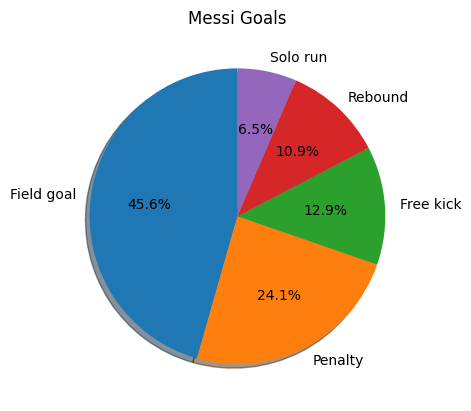

In [214]:
plt.pie(df["count"], labels=df["Goal Type"], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Messi Goals")
plt.show()

In [215]:
df = data["Goal Method"].value_counts().reset_index()
df

,Goal Method,count
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


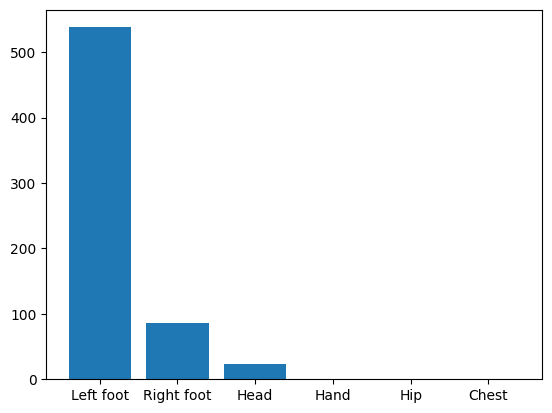

In [216]:
plt.bar(df["Goal Method"], df["count"])
plt.show()

In [217]:
data["Minute"] = data["Minute"].apply(eval)  # ایول کاراکترهای عددی یک استرینگ را با توجه به علامت ریاضی داخلشان اعمال ریاضی روش انجام میدهد

In [218]:
data["Minute"] = data["Minute"].astype(int)

In [219]:
df = data["Minute"].value_counts().reset_index().sort_values(by="Minute", ascending=True)
df

,Minute,count
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


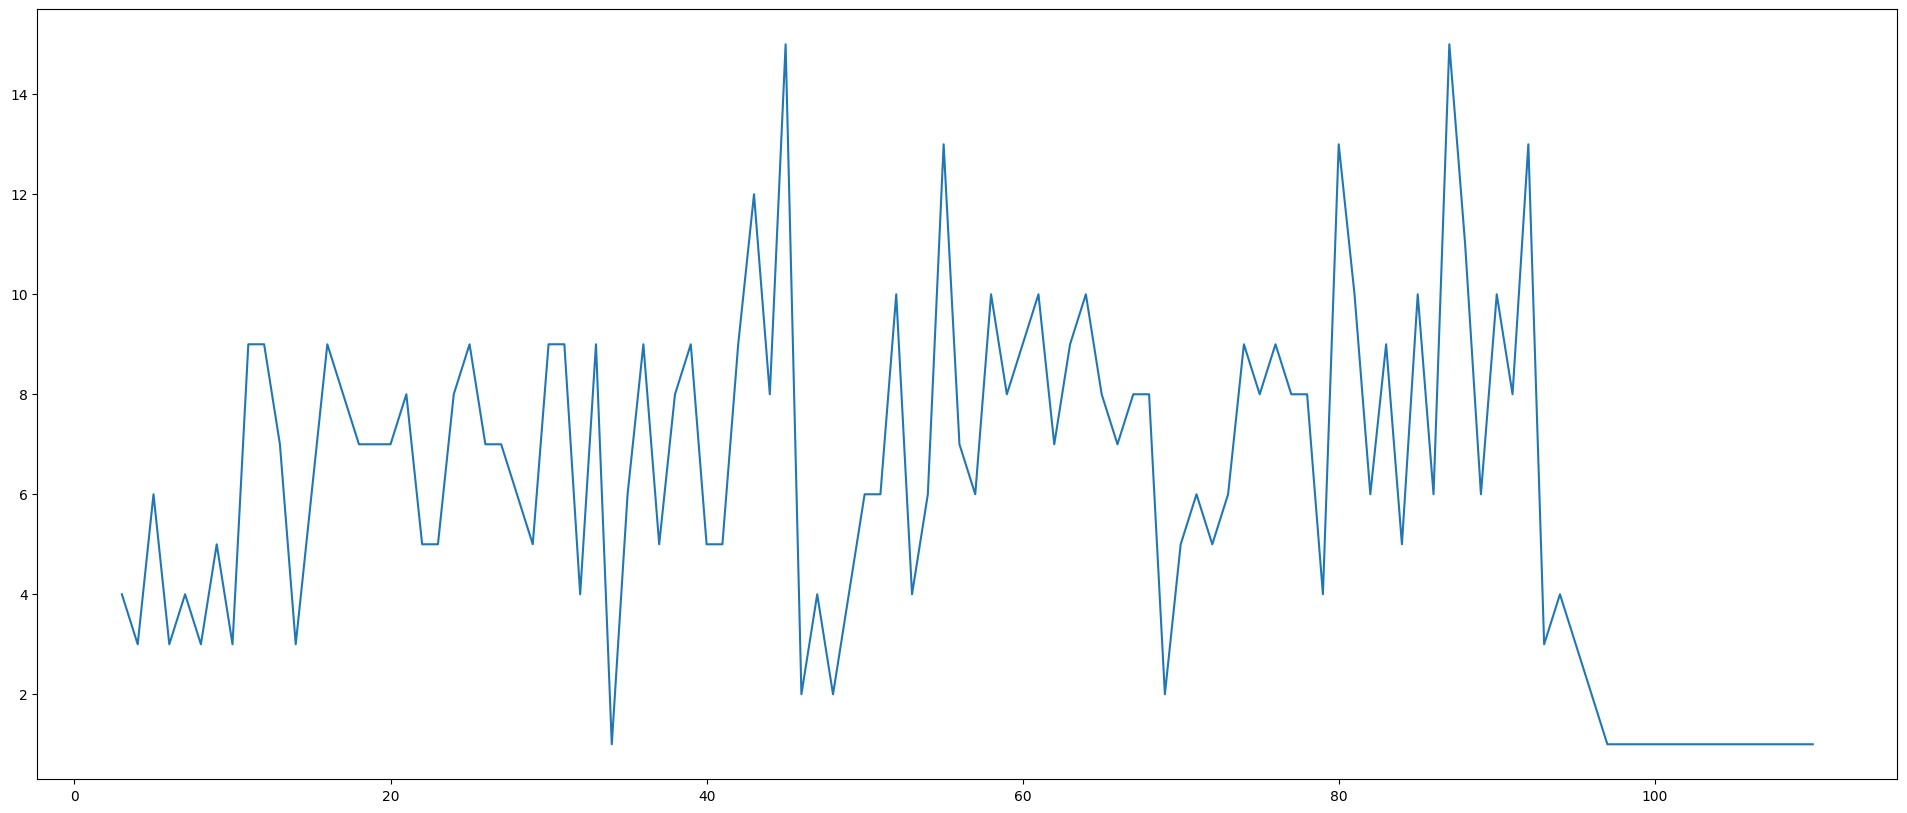

In [220]:
plt.figure(figsize=(24, 10))
plt.plot(df["Minute"], df["count"])
plt.show()

تعداد گلهای مسی در هر سال

In [221]:
df = data["Date"].value_counts().reset_index().sort_values(by="Date", ascending=True)
df

,Date,count
14,2005,3
13,2006,12
10,2007,31
11,2008,22
9,2009,41
1,2010,60
3,2011,59
0,2012,91
8,2013,45
4,2014,58


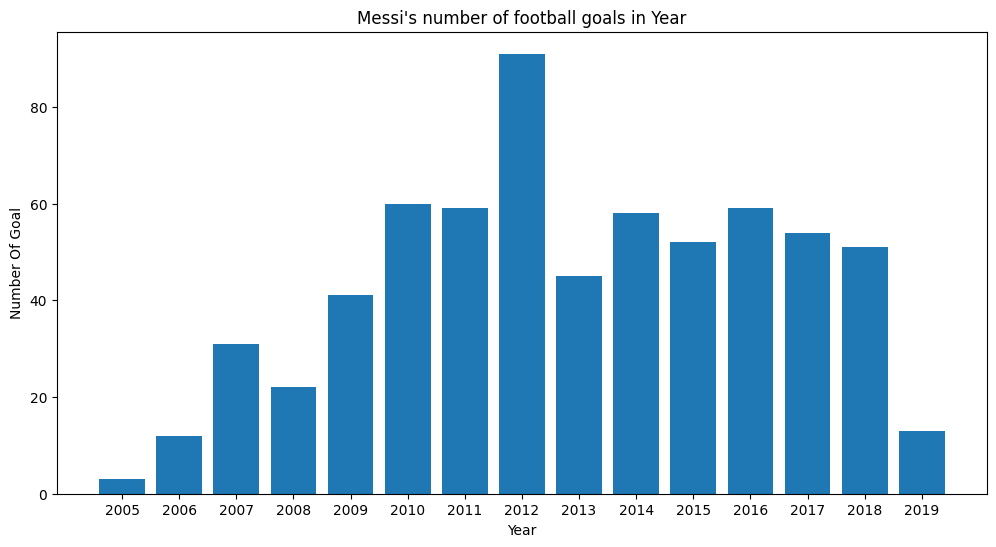

In [222]:
plt.figure(figsize=(12, 6))  
plt.title("Messi's number of football goals in Year")
plt.xlabel("Year")
plt.ylabel("Number Of Goal")
plt.bar(df['Date'].to_numpy(dtype=str), df['count'])  
# plt.xticks(rotation=90)
plt.show()

تعداد اکثریت گلهای مسی با کدام پا زده شده

In [266]:
data.rename(columns = {'Goal Type':'GoalType'}, inplace = True)
df=data.query('GoalType=="Penalty"')['Goal Method'].reset_index()
df=df['Goal Method'].value_counts().reset_index()
df.loc[1]=['Right foot',0]
df

# data.rename(columns = {'Goal Type':'GoalType'}, inplace = True)
# df=data.query('GoalType=="Penalty"').reset_index()
# df.rename(columns = {'Goal Method':'GoalMethod'}, inplace = True)
# df1 = df.query('GoalMethod=="Right foot"' and 'GoalMethod=="Left foot"').reset_index()
# df1=df1['GoalMethod'].value_counts().reset_index()
# df1



,Goal Method,count
0,Left foot,82
1,Right foot,0


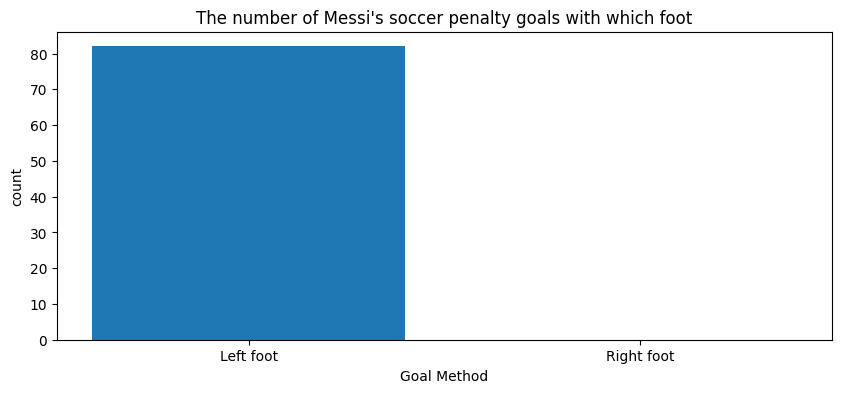

In [267]:
plt.figure(figsize=(10, 4))  
plt.title("The number of Messi's soccer penalty goals with which foot")
plt.xlabel("Goal Method")
plt.ylabel("count")
plt.bar(df['Goal Method'].to_numpy(dtype=str), df['count'])  
plt.show()

چند درصد بازی هایی که در آن ها مسی در وقت اضافه گل زده است، به پیروزی ختم شده

In [293]:
data.rename(columns = {'Final Game Result':'FinalGameResult'}, inplace = True)
df = data.query("Minute>90").reset_index()
df = df["FinalGameResult"].value_counts().reset_index()
df

,FinalGameResult,count
0,Won,27
1,Lost,2
2,Draw,1


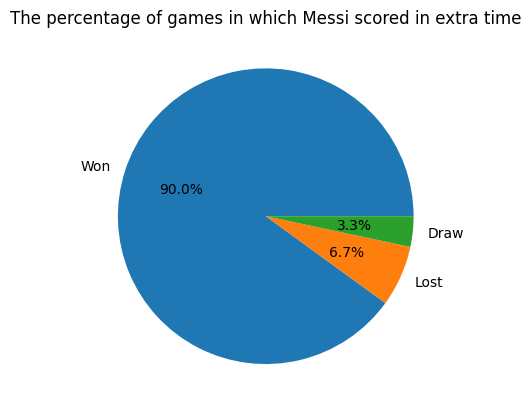

In [297]:
plt.pie(df['count'], labels=df['FinalGameResult'], autopct='%1.1F%%', startangle=0)
plt.title("The percentage of games in which Messi scored in extra time")
plt.show()